## Imports

In [39]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_experiment import *
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/ggplot_sam.mplstyle')
plt.rc('text', usetex=True)
%matplotlib notebook
#%matplotlib inline
%autoreload 2

## Define data_dir and load data

In [60]:
run_dir = '../log_mog_tf/run187/'
data_dir = run_dir + 'run_info/'
figs_dir = run_dir + 'figures1/'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [61]:
with open(data_dir + 'tunneling_rates.pkl', 'rb') as f:
    tunneling_rates = pickle.load(f)
with open(data_dir + 'acceptance_rates.pkl', 'rb') as f:
    acceptance_rates = pickle.load(f)
with open(data_dir + 'tunneling_rates_highT.pkl', 'rb') as f:
    tunneling_rates_highT = pickle.load(f)
with open(data_dir + 'acceptance_rates_highT.pkl', 'rb') as f:
    acceptance_rates_highT = pickle.load(f)
with open(data_dir + 'distances.pkl', 'rb') as f:
    distances = pickle.load(f)
with open(data_dir + 'distances_highT.pkl', 'rb') as f:
    distances_highT = pickle.load(f)

In [62]:
get_vals_as_arr = lambda _dict: np.array(list(_dict.values()))

tr0 = get_vals_as_arr(tunneling_rates)
tr1 = get_vals_as_arr(tunneling_rates_highT)

ar0 = get_vals_as_arr(acceptance_rates)
ar1 = get_vals_as_arr(acceptance_rates_highT)

d0 = get_vals_as_arr(distances)
d1 = get_vals_as_arr(distances_highT)

tunneling_rates_avg = tr0[:, 0]
tunneling_rates_err = tr0[:, 1]
tunneling_rates_avg_highT = tr1[:, 0]
tunneling_rates_err_highT = tr1[:, 1]

acceptance_rates_avg = ar0[:, 0]
acceptance_rates_err = ar0[:, 1]
acceptance_rates_avg_highT = ar1[:, 0]
acceptance_rates_err_highT = ar1[:, 1]

distances_avg = d0[:, 0]
distances_err = d0[:, 1]
distances_avg_highT = d1[:, 0]
distances_err_highT = d1[:, 1]

In [64]:
steps_arr = []
temp_arr = []
for key in tunneling_rates_highT.keys():
    steps_arr.append(key[0]+1)
    temp_arr.append(key[1])

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


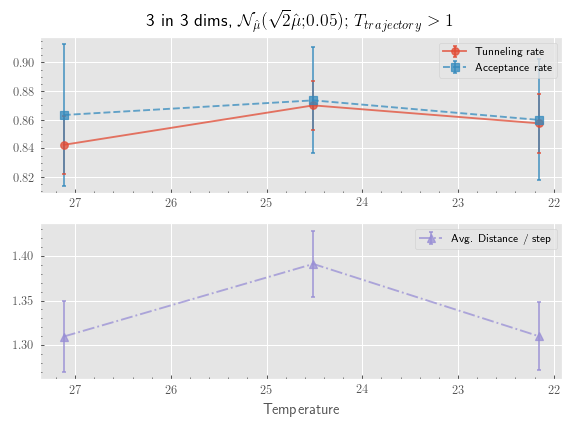

In [66]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(temp_arr, distances_avg_highT, yerr=distances_err_highT,
                 color='C2', marker='^', ls='-.', fillstyle='full',
                 label='Avg. Distance / step',
                 capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Temperature', fontsize=12)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
grid = axes[0].grid(True)
grid = axes[1].grid(True)

legend = axes[0].legend(loc='best', fontsize=9)
legend = axes[1].legend(loc='best', fontsize=9)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_temp_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


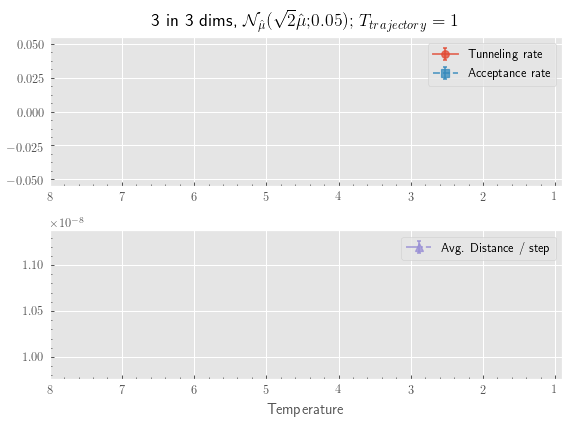

In [67]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='--', fillstyle='full',
                      label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(temp_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='-.', fillstyle='full',
                       label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Temperature', fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
#axes[0].set_xscale("log")#, nonposx='clip')
#axes[1].set_xscale("log")#, nonposx='clip')
#axes[0].set_yscale("log")#, nonposx='clip')
#axes[1].set_yscale("log")#, nonposx='clip')
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
xlim = axes[0].set_xlim((8, 0.9))
xlim = axes[1].set_xlim((8, 0.9))
grid = axes[0].grid(True)
grid = axes[1].grid(True)

fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_temp_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


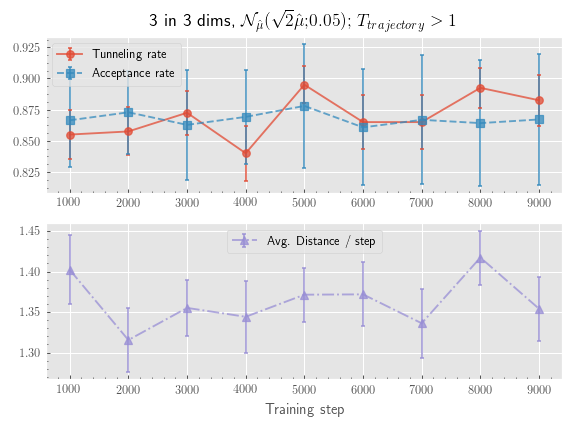

In [56]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, distances_avg_highT, yerr=distances_err_highT,
                       color='C2', marker='^', ls='-.', fillstyle='full',
                       label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


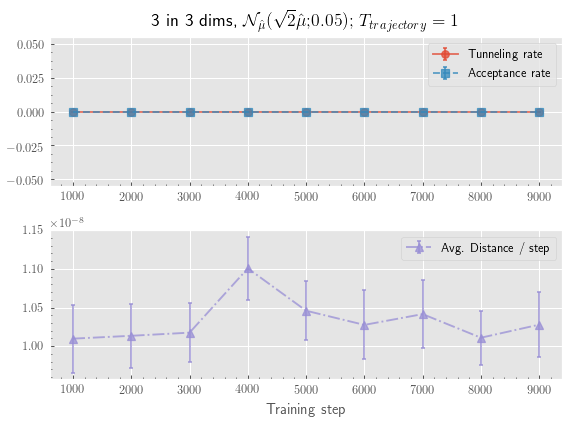

In [57]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='--', fillstyle='full',
                      label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='-.', fillstyle='full',
                       label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


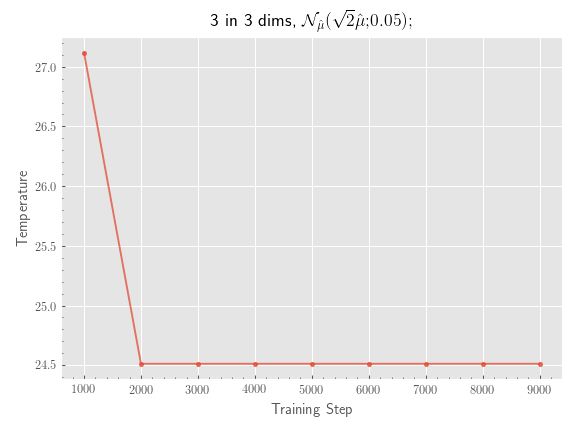

Text(0.5,0,'Training Step')

Text(0,0.5,'Temperature')

In [59]:
fig, ax = plt.subplots()
p = ax.plot(steps_arr, temp_arr, marker='.', ls='-', fillstyle='full', alpha=0.75)
ax.set_xlabel('Training Step')
ax.set_ylabel('Temperature')

str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1# + r'$T_{trajectory} = 1$'
title = ax.set_title(title_str)#, fontsize=0)
grid = ax.grid(True)
fig.tight_layout()
out_file = figs_dir + 'temperature_vs_training_step.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

In [51]:
def f1(t0, rate, num_steps=None, func=None, *args):
    temp = t0
    temp_arr = [t0]
    count = 1
    while temp_arr[-1] > 1:
        if num_steps is not None:
            if count > num_steps:
                return temp_arr
        if func is None:
            tt = temp_arr[-1] * rate 
        else:
            tt = func(temp_arr[-1], rate, count, *args)
        temp_arr.append(max(1, tt))
        count += 1
    return temp_arr

In [52]:
def annealing_temps(t0, rate, func=None, *args):
    temp = t0
    temp_arr = [t0]
    count = 1
    while temp_arr[-1] > 1:
        if func is None:
            tt = temp_arr[-1] * rate 
        else:
            tt = func(count, *args)
        temp_arr.append(max(1, tt))
        count += 1
    return temp_arr
        
def exp_anneal(k, t0, rate):
    return t0 * np.exp(-k * rate)

def dynamic_rate_anneal(k, t0, rate0, rate):
    new_rate = rate0 * (rate ** k)
    return t0 * (new_rate ** k)

def optimal_anneal(k, t0, dimension):
    return t0 * ((np.sqrt(dimension) - 1) ** k)

In [53]:
alpha0 = 0.98
y0 = annealing_temps(t0, alpha0)

NameError: name 't0' is not defined

In [ ]:
l2 = 0.02
y2 = annealing_temps(t0, l2, exp_anneal, *[t0, l2])

In [ ]:
dimension = 5 
y3 = annealing_temps(t0, l3, optimal_anneal, *[t0, dimension])

In [ ]:
alpha1 = 1 - 1E-5
y4 = annealing_temps(t0, alpha0, dynamic_rate_anneal, *[t0, alpha0, alpha1])

In [ ]:
len(y1), len(y2), len(y3), len(y4)

In [ ]:
f1??

In [ ]:
plt.style.use('fivethirtyeight')

s1 = r'''$T_{k+1} = \alpha T_{k}, \,\,\alpha = 0.98$'''
s2 = r'''$T(k) = T_0 e^{-\lambda k},\,\, \lambda = 5e-4$'''
s3 = r'''$ T_{k+1} = (\sqrt(N) - 1) T_{k}, \,\,\, N = 3$'''
s4 = (r'''$T_{k+1} = (\alpha_0)^{\alpha_1 k} T_k,$''' 
      + r'''$\,\,\alpha_0 = 0.98, \alpha_1=1-1E-4$''')

fig, ax = plt.subplots()
p1 = ax.plot(np.arange(len(y1)), y1, label=s1)
p2 = ax.plot(np.arange(len(y2)), y2, label=s2)
p3 = ax.plot(np.arange(len(y3)), y3, label=s3)
p4 = ax.plot(np.arange(len(y4)), y4, label=s4)
ax.set_xlabel('$k$')
#ax.set_yscale("log")#, nonposx='clip')
#ax.set_xscale("log")#, nonposx='clip')
#max_iters = max(len(y1), len(y2), len(y4))
#ax.set_xlim((100, max_iters+3))
leg = ax.legend(loc='best', fontsize=12)

In [ ]:
#def f0(t0, rate, k):
#    temp_arr = [t0]
#    next_t = t0 * (rate ** (k+1))
#    while next_t > 1:
#        temp_arr.append(next_t)
#        return f0(t0, rate, k+1)
#    return 1

In [ ]:
y2[:10], y3[:10]

In [ ]:
def f_exp(t0, rate, k):
    return max(1, t0 * np.exp(-rate * k))

def f_const(t0, rate, k):
    return max(1, t0 * (rate ** k))

In [ ]:
t0 = 30
rate = 0.98
k0 = 1
y0 = [t0]
def annealing_temps(t0, rate, func):
    k = 1
    arr = []
    while func(t0, rate, k) > 1:
        arr.append(f_exp(t0, rate, k))
        k += 1
    return arr

y_exp = annealing_temps(t0, rate, f_exp)
y_const = annealing_temps(t0, rate, f_const)

In [ ]:
y_exp

In [ ]:
len(y1)